In [1]:
import warnings
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud
from nltk.corpus import stopwords

warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [509]:
data = pd.read_csv("googleplaystore.csv")
comments = pd.read_csv("googleplaystore_user_reviews.csv")
comments.dropna(inplace = True, how = "any")
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [510]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of word in this dataset such as '{}'... \n".format(len(comments.Translated_Review.unique()),
                                                                           ", ".join(comments.Translated_Review.unique()[0:5])))

There are 10841 observations and 13 features in this dataset. 

There are 27994 types of word in this dataset such as 'I like eat delicious food. That's I'm cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)", This help eating healthy exercise regular basis, Works great especially going grocery store, Best idea us, Best way'... 



In [511]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [512]:
comments.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [513]:
df.dropna(inplace = True, how = "any")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [514]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [515]:
print(len(data['Category'].unique()), "categories")
print(data['Category'].unique())

34 categories
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [516]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [517]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              7723 non-null float64
Installs          9360 non-null float64
Type              9360 non-null object
Price             9360 non-null float64
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1023.8+ KB


In [519]:
df.drop(19, axis = 0)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.600,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.000,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.000,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.000,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.100,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


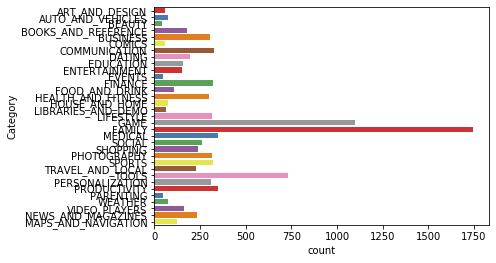

In [520]:
sns.countplot(y = "Category", data = df, palette = "Set1")

In [521]:
np.mean(df.Rating)

4.191837606837606

In [522]:
for rating in df.Rating:
    if(rating > 5):
        print(rating)

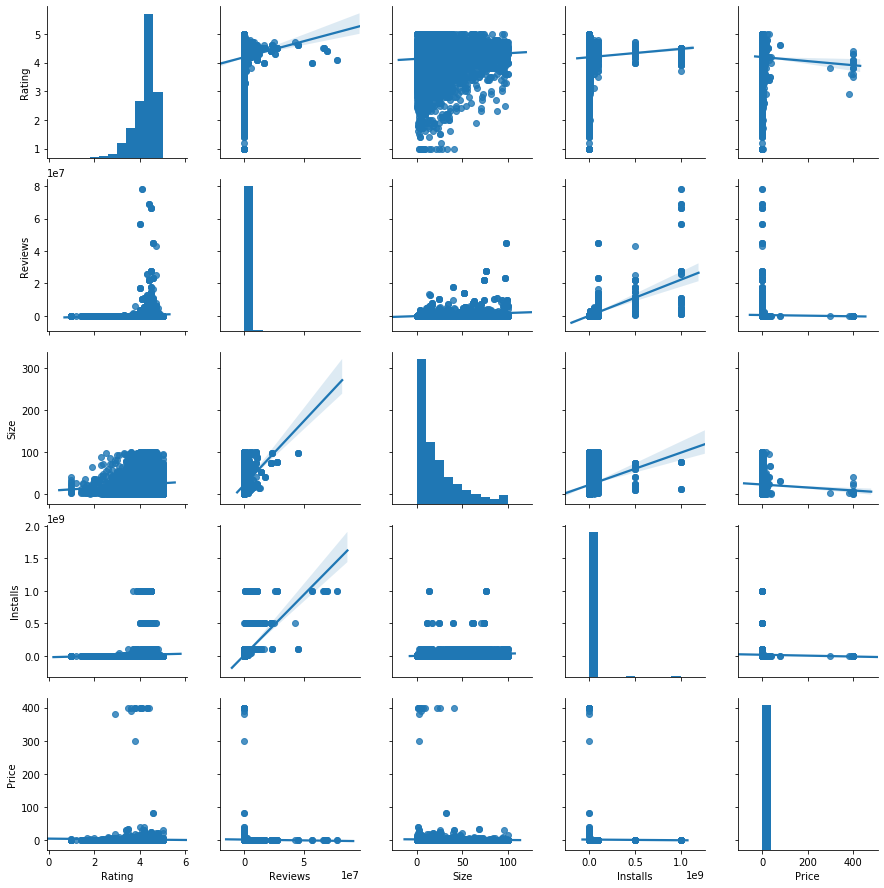

In [523]:
sns.pairplot(df, kind = "reg")

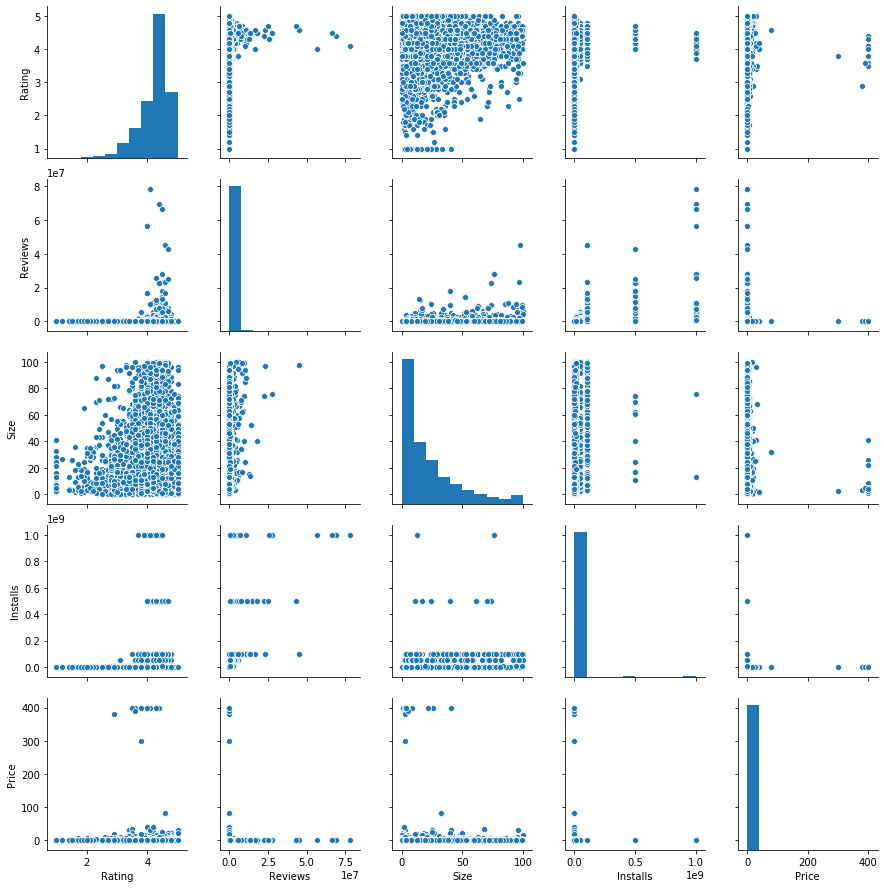

In [524]:
sns.pairplot(df, kind = "scatter")

In [525]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068133,0.083640,0.051337,-0.021919
Reviews,0.068133,1.000000,0.240382,0.641605,-0.009824
Size,0.083640,0.240382,1.000000,0.162707,-0.026272
Installs,0.051337,0.641605,0.162707,1.000000,-0.011895
Price,-0.021919,-0.009824,-0.026272,-0.011895,1.000000


In [526]:

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


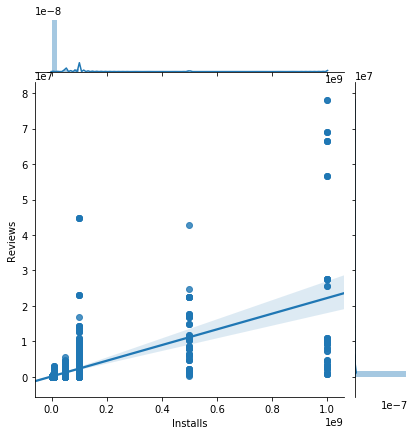

In [527]:
sns.jointplot(y = df['Reviews'], x = df['Installs'], kind = 'reg')

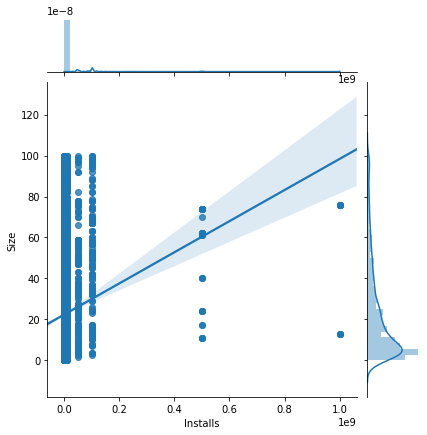

In [528]:
sns.jointplot(y = df['Size'], x = df['Installs'], kind = 'reg')

In [529]:
merged_df = pd.merge(df, comments, on=["App"])

In [530]:
categories = ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT',
 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK' ,'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL',
 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS',
 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']

for category in categories:
    exec('comment_{} = merged_df[merged_df["Category"] == category]'.format(category))
    
for category in categories:
    exec('df_{} = df[df["Category"] == category]'.format(category))
    print(category)
    exec("print(np.mean(df_{}))".format(category))


ART_AND_DESIGN
Rating      4.377049e+00
Reviews     2.810356e+04
Size        1.293966e+01
Installs    2.036526e+06
Price       9.786885e-02
dtype: float64
AUTO_AND_VEHICLES
Rating           4.190411
Reviews      15940.136986
Size            21.541286
Installs    727805.479452
Price            0.027260
dtype: float64
BEAUTY
Rating           4.278571
Reviews       9407.928571
Size            15.513514
Installs    640861.904762
Price            0.000000
dtype: float64
BOOKS_AND_REFERENCE
Rating      4.346067e+00
Reviews     1.233633e+05
Size        1.438625e+01
Installs    1.079377e+07
Price       1.341573e-01
dtype: float64
BUSINESS
Rating      4.121452e+00
Reviews     4.605309e+04
Size        1.491172e+01
Installs    3.306165e+06
Price       2.455116e-01
dtype: float64
COMICS
Rating           4.155172
Reviews      58309.396552
Size            13.158224
Installs    966139.655172
Price            0.000000
dtype: float64
COMMUNICATION
Rating      4.158537e+00
Reviews     2.486164e+06
Size 

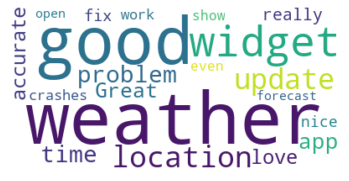

In [531]:
stop = stopwords.words('english')
stop = stop + ['app', 'APP' ,'ap', 'App', 'apps', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address',
            'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'Launcher']
text = " ".join(review for review in comment_WEATHER.Translated_Review if review not in stop)
wordcloud = WordCloud(background_color="white", max_words = 20).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [532]:
df.dropna(inplace=True)
print(df.shape)

(7723, 13)


In [533]:
df.isnull().values.any()

False

In [534]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [535]:
catgry=pd.get_dummies(df['Category'],prefix='catg',drop_first=True)
typ=pd.get_dummies(df['Type'],prefix='typ',drop_first=True)
cr=pd.get_dummies(df['Content Rating'],prefix='cr',drop_first=True)
frames=[df,catgry,typ,cr]
df=pd.concat(frames,axis=1)
#df.drop(['Category','Installs','Type','Content Rating'],axis=1,inplace=True)

In [536]:
df.drop(['App','Category','Type','Genres','Last Updated','Content Rating','Current Ver','Android Ver'],axis=1,inplace=True)

In [537]:
#
X=df.drop('Rating',axis=1)
y=df['Rating'].values.astype("int64")


In [538]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [539]:
#LogisticRegression
lr_c=LogisticRegression()
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)


In [540]:
lr_cm=confusion_matrix(y_test,lr_pred)
lr_cm

array([[   0,    0,    0,    6,    0],
       [   0,    0,    0,   44,    0],
       [   0,    0,    1,  287,    0],
       [   0,    0,    4, 1155,    0],
       [   0,    0,    0,   48,    0]], dtype=int64)

In [554]:
accuracy_score(y_test, lr_pred)


0.7482200647249191

In [555]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        44
           3       0.20      0.00      0.01       288
           4       0.75      1.00      0.86      1159
           5       0.00      0.00      0.00        48

   micro avg       0.75      0.75      0.75      1545
   macro avg       0.19      0.20      0.17      1545
weighted avg       0.60      0.75      0.64      1545



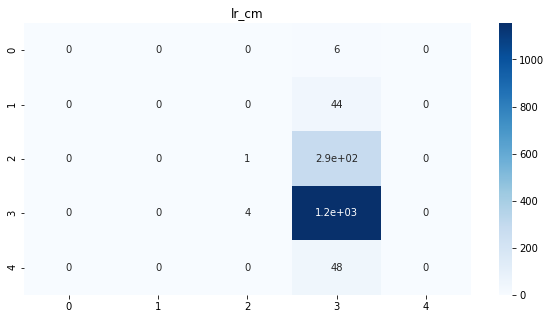

In [544]:
plt.figure(figsize=(10,5))
plt.title("lr_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues")
plt.show()

In [545]:
# DecisionTree Classifier
dtree_c=DecisionTreeClassifier()
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
print(accuracy_score(dtree_pred,y_test))

0.684789644012945


In [556]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.21      0.18      0.20        44
           3       0.33      0.37      0.35       288
           4       0.82      0.79      0.81      1159
           5       0.43      0.48      0.46        48

   micro avg       0.68      0.68      0.68      1545
   macro avg       0.36      0.37      0.36      1545
weighted avg       0.70      0.68      0.69      1545



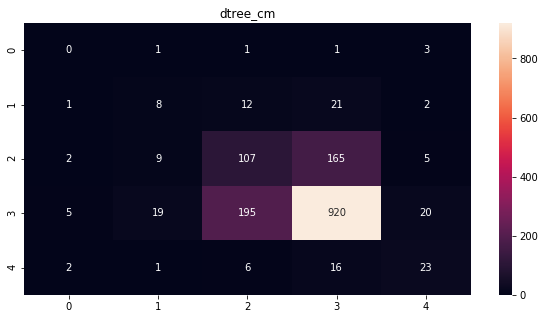

In [546]:
plt.figure(figsize=(10,5))
plt.title("dtree_cm")
sns.heatmap(dtree_cm,annot=True,fmt="d")


In [547]:
#SVM regressor
svc_r=SVC()
svc_r.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [548]:
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
accuracy_score(y_test, svr_pred)

0.7637540453074434

In [557]:
print(classification_report(y_test,svr_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.50      0.02      0.04        44
           3       0.53      0.09      0.16       288
           4       0.78      0.97      0.86      1159
           5       0.58      0.54      0.56        48

   micro avg       0.76      0.76      0.76      1545
   macro avg       0.48      0.33      0.33      1545
weighted avg       0.71      0.76      0.70      1545



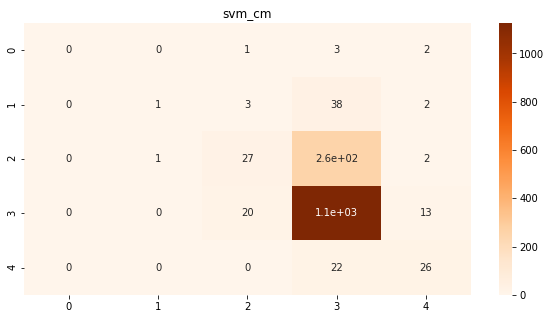

In [549]:
plt.figure(figsize=(10,5))
plt.title("svm_cm")
sns.heatmap(svr_cm,annot=True,cmap="Oranges")

In [552]:
#RandomForest
rdf_c=RandomForestClassifier()
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
accuracy_score(rdf_pred,y_test)

0.7307443365695793

In [559]:
print(classification_report(y_test,rdf_pred))

              precision    recall  f1-score   support

           1       0.33      0.17      0.22         6
           2       0.37      0.16      0.22        44
           3       0.40      0.37      0.39       288
           4       0.82      0.85      0.84      1159
           5       0.48      0.58      0.53        48

   micro avg       0.73      0.73      0.73      1545
   macro avg       0.48      0.43      0.44      1545
weighted avg       0.72      0.73      0.72      1545



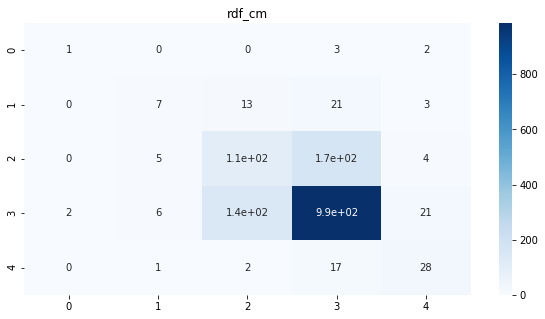

In [553]:
plt.figure(figsize=(10,5))
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,cmap="Blues")